In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data_path = "../data/tabular/series_metadata.csv"

df = pd.read_csv(data_path)

In [76]:
df.head()

,start_index,end_index,MSE_0,MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,...,AVG_SSIM,CHANNEL_0,CHANNEL_1,CHANNEL_2,CHANNEL_3,CHANNEL_4,CHANNEL_5,CHANNEL_6,CHANNEL_7,CHANNEL_8
0,0,9,0.000000,0.000000,0.006869,0.000000,0.000000,0.004812,0.0,0.000000,...,0.900631,103.845184,0.0,0.0,0.000000,0.000000,63.951360,0.013435,0.0,128.348460
1,1,10,0.000000,0.006869,0.000000,0.000000,0.004812,0.000000,0.0,0.000000,...,0.900631,53.441868,0.0,0.0,0.000000,0.000149,29.384336,0.445748,0.0,64.198990
2,2,11,0.006869,0.000000,0.000000,0.004812,0.000000,0.000000,0.0,0.000000,...,0.900631,11.086669,0.0,0.0,0.000149,0.013732,5.759867,5.430315,0.0,35.809890
3,3,12,0.000000,0.000000,0.004812,0.000000,0.000000,0.000000,0.0,0.000000,...,0.918762,0.879055,0.0,0.0,0.013435,0.472766,0.445991,24.290306,0.0,40.785810
4,4,13,0.000000,0.004812,0.000000,0.000000,0.000000,0.000000,0.0,0.004812,...,0.918762,0.025855,0.0,0.0,0.445748,6.335247,0.012927,39.907257,0.0,24.083387


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359792 entries, 0 to 359791
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   start_index  359792 non-null  int64  
 1   end_index    359792 non-null  int64  
 2   MSE_0        359792 non-null  float64
 3   MSE_1        359792 non-null  float64
 4   MSE_2        359792 non-null  float64
 5   MSE_3        359792 non-null  float64
 6   MSE_4        359792 non-null  float64
 7   MSE_5        359792 non-null  float64
 8   MSE_6        359792 non-null  float64
 9   MSE_7        359792 non-null  float64
 10  MSE_8        359792 non-null  float64
 11  SSIM_0       358724 non-null  float64
 12  SSIM_1       358724 non-null  float64
 13  SSIM_2       358724 non-null  float64
 14  SSIM_3       358724 non-null  float64
 15  SSIM_4       358724 non-null  float64
 16  SSIM_5       358724 non-null  float64
 17  SSIM_6       358724 non-null  float64
 18  SSIM_7       358724 non-

There is a problem since some rows are NaN

In [78]:
df[df.isna().any(axis=1)]

,start_index,end_index,MSE_0,MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,...,AVG_SSIM,CHANNEL_0,CHANNEL_1,CHANNEL_2,CHANNEL_3,CHANNEL_4,CHANNEL_5,CHANNEL_6,CHANNEL_7,CHANNEL_8
32662,32662,32671,0.000000,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.603055,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32663,32663,32672,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.603055,0.000000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32664,32664,32673,0.000000,0.000000,0.000000,0.000000,0.000000,0.603055,0.000000,0.000000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32665,32665,32674,0.000000,0.000000,0.000000,0.000000,0.603055,0.000000,0.000000,0.000000,...,NaN,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
32666,32666,32675,0.000000,0.000000,0.000000,0.603055,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.0,0.0,0.000297,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281262,281262,281271,0.000000,0.000000,0.000000,0.000000,0.000000,0.456889,0.000000,0.000000,...,NaN,0.000149,0.0,0.0,0.000446,0.0,0.0,0.000000,0.0,0.0
281263,281263,281272,0.000000,0.000000,0.000000,0.000000,0.456889,0.000000,0.000000,0.010812,...,NaN,0.013582,0.0,0.0,0.040450,0.0,0.0,0.000000,0.0,0.0
281264,281264,281273,0.000000,0.000000,0.000000,0.456889,0.000000,0.000000,0.010812,0.000000,...,NaN,0.459138,0.0,0.0,1.350547,0.0,0.0,0.000000,0.0,0.0
281265,281265,281274,0.000000,0.000000,0.456889,0.000000,0.000000,0.010812,0.000000,0.000000,...,NaN,5.875484,0.0,0.0,16.735043,0.0,0.0,0.000149,0.0,0.0


In [79]:
# Drop rows with missing values
df = df.dropna()

In [80]:
n_channels = 9
predicted_columns = [f"CHANNEL_{i}" for i in range(n_channels)]

In [81]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [82]:
X_train = trainset.loc[:, ~trainset.columns.isin(predicted_columns)]
y_train = trainset[predicted_columns]

# Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [84]:
X_test = testset.loc[:, ~trainset.columns.isin(predicted_columns)]
y_test = testset[predicted_columns]

In [85]:
lr_pred = lr_model.predict(X_test)

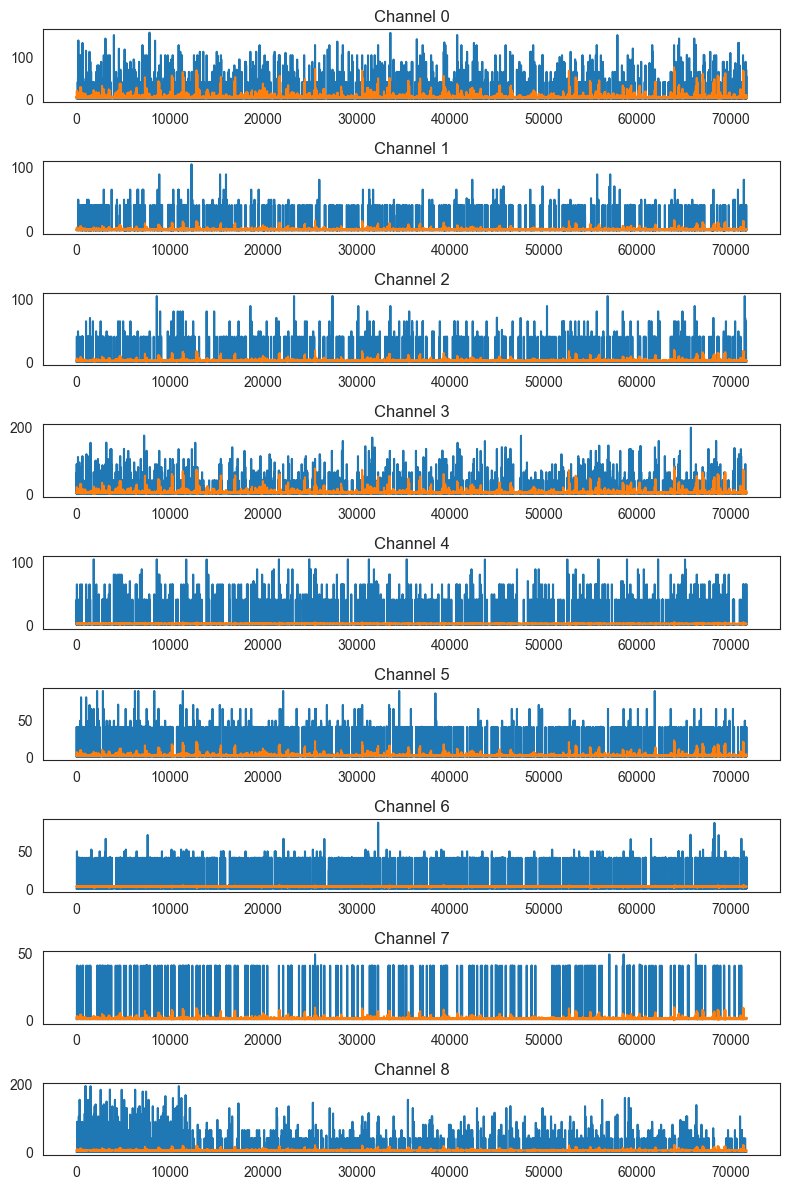

In [87]:
sns.plotting_context("notebook", font_scale=1.2)
sns.set_style("white")

def plot_predictions(y_true, y_pred, n_channels):
    # Plot linear regression predictions for all channels
    fig, axs = plt.subplots(nrows=n_channels, figsize=(8, 12))
    for i in range(n_channels):
        axs[i].plot(y_true[:, i], label="True")
        axs[i].plot(y_pred[:, i], label="Predicted")
        axs[i].set_title(f"Channel {i}")
    plt.tight_layout()
    plt.show()

plot_predictions(y_test.values, lr_pred, n_channels)

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [89]:
rf_pred = rf_model.predict(X_test)
score_rf = rf_model.score(X_test, y_test)

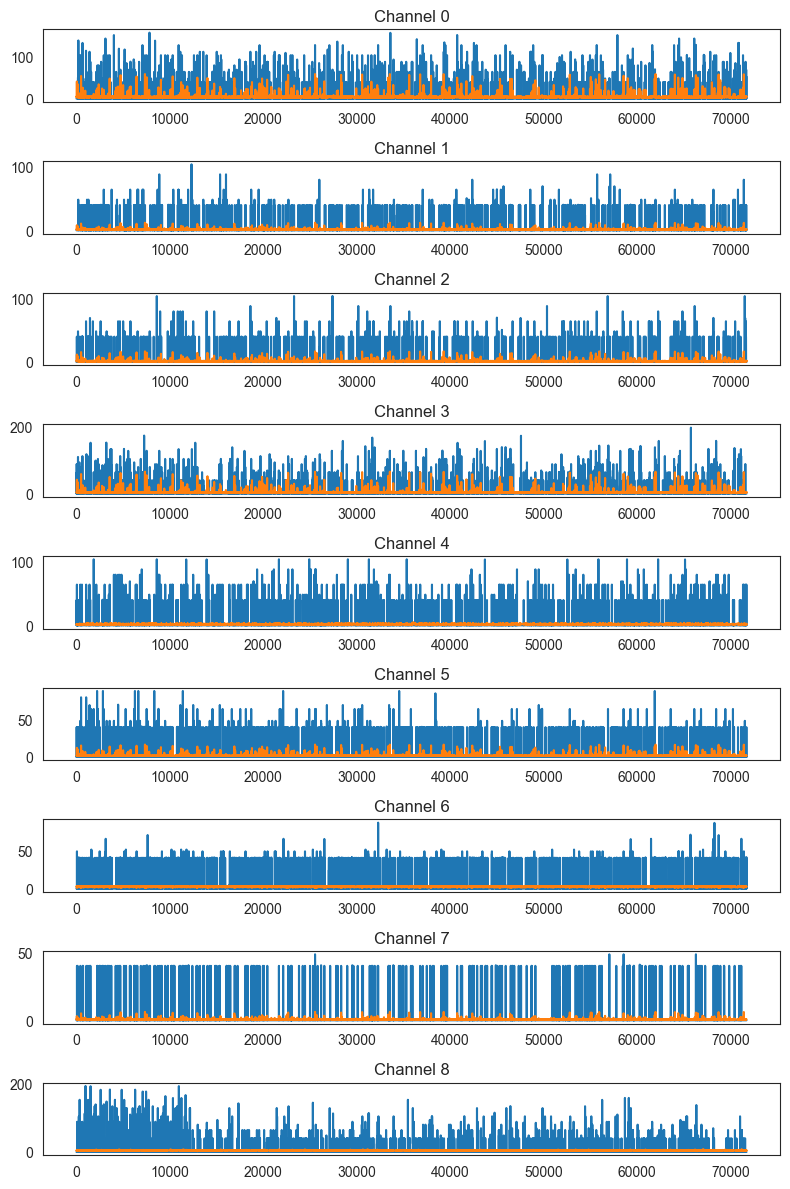

In [90]:
plot_predictions(y_test.values, rf_pred, n_channels)

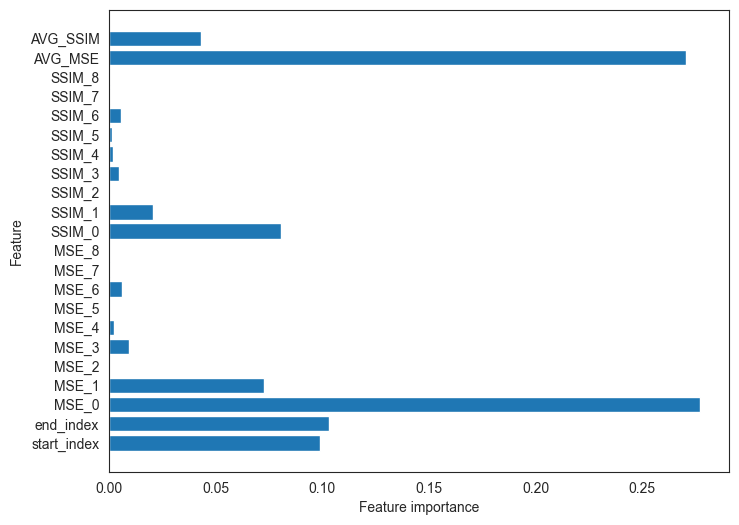

In [91]:
importance = rf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(X_train.columns, importance)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# XGBoost

In [92]:
import xgboost as xgb
params = {"objective": "reg:squarederror", "tree_method": "hist", "device" : "cuda"}

In [93]:
n = 100
xgb_reg = xgb.XGBRegressor(n_estimators=n, **params)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
model = xgb_reg.get_booster()

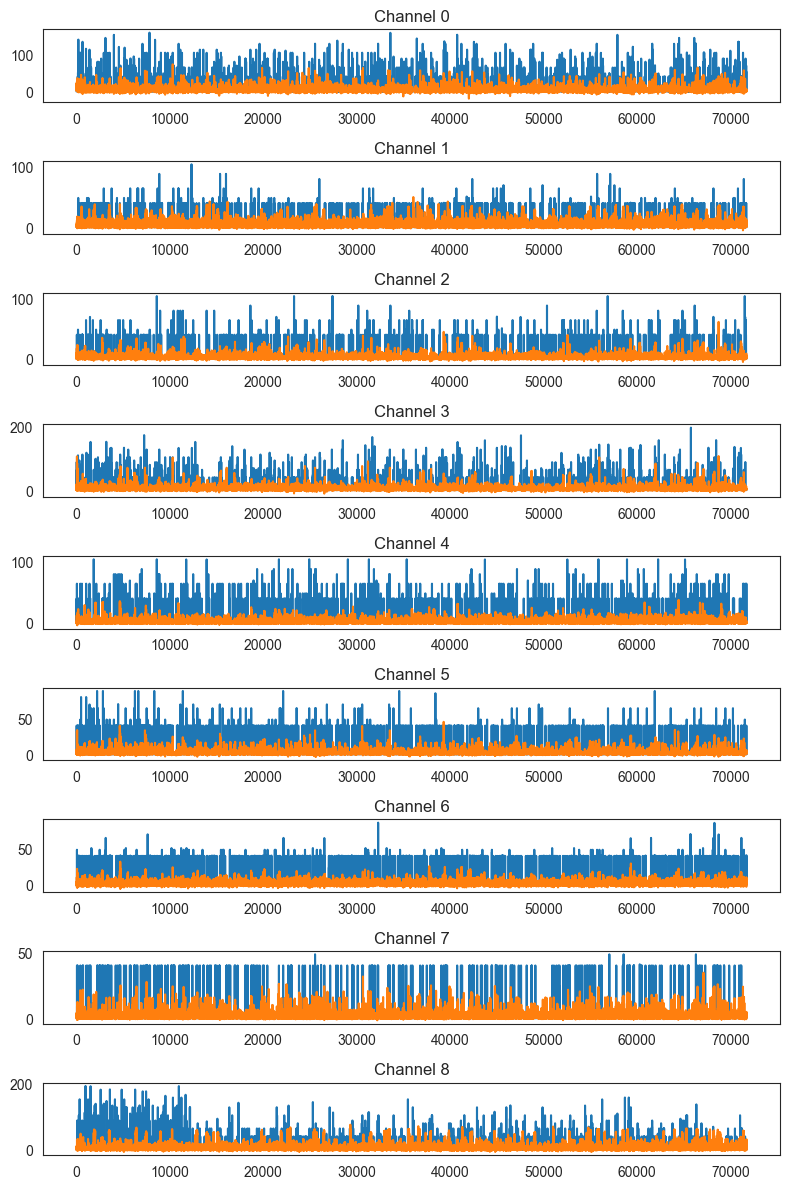

In [94]:
plot_predictions(y_test.values, xgb_pred, n_channels)

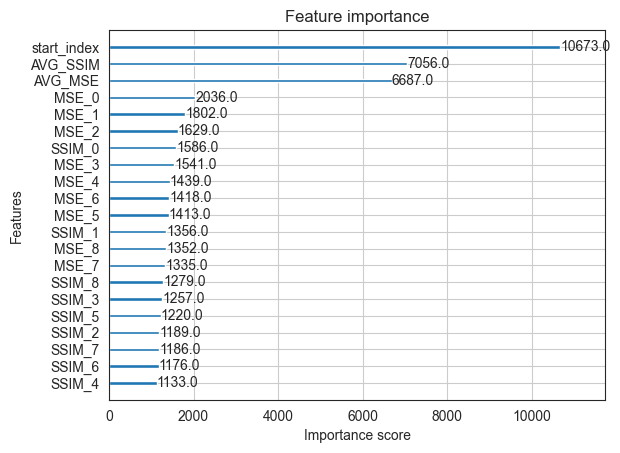

In [95]:
xgb.plot_importance(model)
plt.show()

### Model evaluation

In [98]:
from scipy.stats import pearsonr

In [103]:
lr_r, p = pearsonr(y_test.values, lr_pred)
rf_r, p = pearsonr(y_test.values, rf_pred)
xgb_r, p = pearsonr(y_test.values, xgb_pred)

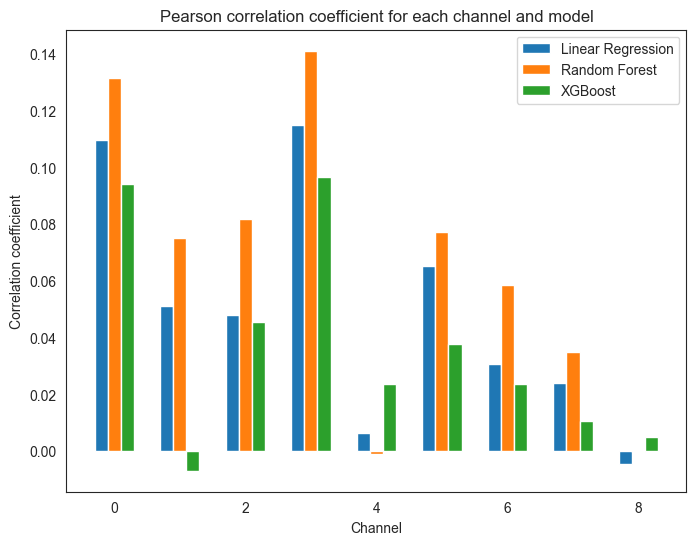

In [108]:
# Plot correlation coefficients barplot side by side
plt.figure(figsize=(8, 6))
plt.bar(np.arange(n_channels) - 0.2, lr_r, width=0.2, label="Linear Regression")
plt.bar(np.arange(n_channels), rf_r, width=0.2, label="Random Forest")
plt.bar(np.arange(n_channels) + 0.2, xgb_r, width=0.2, label="XGBoost")
plt.xlabel("Channel")
plt.ylabel("Correlation coefficient")
plt.title("Pearson correlation coefficient for each channel and model")
plt.legend()
plt.show()

# Symbolic Regression

In [112]:
from gplearn.genetic import SymbolicRegressor
from sympy import sympify, sin, cos

In [113]:
# First Test
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
est_gp = SymbolicRegressor(population_size=500,function_set=function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           feature_names=X_train.columns)

In [114]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

In [ ]:
est_gp.fit(X_train, y_train.iloc[:, 0])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.94          32353.9        3          4.36757          4.58914      5.72m
   1     3.39          2127.13        3          4.36812          4.59562      3.27m
   2     2.10          31671.9        1          4.36031          4.66586      2.78m
   3     1.42          580.457        1          4.36485          4.62518      2.45m
   4     1.26          11353.9        1          4.36085          4.66099      2.24m
   5     1.27          1133.32        1          4.36209          4.64318      2.09m
   6     1.24          11703.9        1          4.36543          4.61309      1.95m
   7     1.33          12420.3        1          4.36593          4.61533      1.81m
   8     1.20          11949.3        1          4.36561          4.61153  

ValueError: y_true and y_pred have different number of output (9!=1)

In [ ]:
print('R2:',est_gp.score(X_test, y_test.iloc[:, 0]))
next_e = sympify((est_gp._program), locals=converter)
next_e

R2: -0.0566379384821154


C:\Users\kapib\AppData\Local\Temp\ipykernel_19344\125943068.py:2: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'MSE_2'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  next_e = sympify((est_gp._program), locals=converter)


MSE_2

In [119]:
gp_pred = est_gp.predict(X_test)

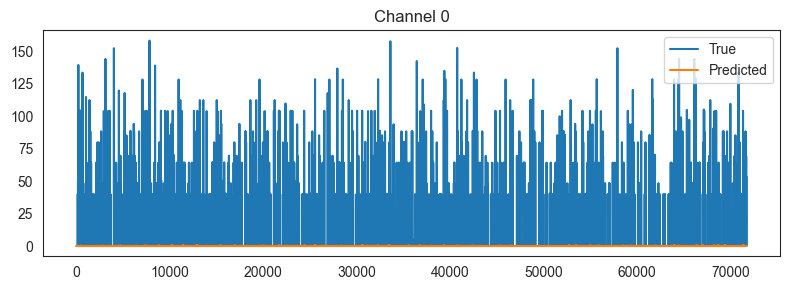

In [130]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(y_test.values[:, 0], label="True")
ax.plot(gp_pred, label="Predicted")
ax.set_title(f"Channel 0")
plt.tight_layout()
plt.legend()
plt.show()